<a href="https://colab.research.google.com/github/ValeriaYashan/Herramientas-IA/blob/main/IMAGENES_STABLEDIFFUSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers
!pip install diffusers
import torch
from diffusers import StableDiffusionPipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 29.7 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-z9bkp29p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-z9bkp29p
  Resolved https://github.com/huggingface/diffusers to commit 13001ee315171c4f9e2fec4ed7862e19fa453a5e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.26.0.dev0-py3-none-any.whl size=1944387 sha256=4ac4dfcd93d7c4ea74e03b7637ec86b5d2766d725d1b3b0a5dd8dc50d46b56b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ul_4jax/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffuser

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
#https://civitai.com/
#https://huggingface.co/

In [ ]:
from transformers import CLIPProcessor
from PIL import Image, ImageDraw, ImageFont
# Initialize CLIP Processor
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
# Initialize Stable Diffusion Pipeline
pipe = StableDiffusionPipeline.from_pretrained("stablediffusionapi/rev-animated", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker= None


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [ ]:
# Base image prompt for Alex
prompt_alex_base = "illustration of a shy, 8-year-old, red-haired boy named Alex, the main character"
height_alex_base, width_alex_base = 600, 600

# Generate and save the base image of Alex
image_alex_base = pipe(prompt_alex_base, height=height_alex_base, weight=width_alex_base).images[0]
image_alex_base.save("alex_base.png")

# Initialize font and ImageDraw for adding text
font = ImageFont.load_default()
draw = ImageDraw.Draw(image_alex_base)

# List to store generated images for each page
generated_images = []

# Page 1: "The Boring Day"
title_page1 = "The Boring Day"
prompt_page1 = "colorful illustration of Alex finding creative ways to beat boredom in his room"
negative_prompt_page1 = "lonely, monotonous, dull, uninspiring, uninteresting, bland, lifeless"
height_page1, width_page1 = 600, 600
negative_keywords_page1 = "(((alone))), ((isolated)), ((uninspired)), ((disconnected)), ((lifeless))"
image_page1 = pipe(prompt_page1, height=height_page1, weight=width_page1, negative_prompt=negative_keywords_page1).images[0]

# Overlay Alex onto the generated image for Page 1
image_page1_with_alex = Image.alpha_composite(Image.new("RGBA", image_page1.size), image_page1.convert("RGBA"))
image_page1_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page1, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page1_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page1_with_alex

# Page 2: "Family Concern"
title_page2 = "Family Concern"
prompt_page2 = "heartwarming scene of Alex's family showing love and efforts to help him find friends and joy"
negative_prompt_page2 = "cold, distant, unsupportive, indifferent, unloving"
height_page2, width_page2 = 600, 600
negative_keywords_page2 = "(((unloved))), ((unsupported)), ((neglected)), ((cold-hearted)), ((indifferent))"
image_page2 = pipe(prompt_page2, height=height_page2, weight=width_page2, negative_prompt=negative_keywords_page2).images[0]

# Overlay Alex onto the generated image for Page 2
image_page2_with_alex = Image.alpha_composite(Image.new("RGBA", image_page2.size), image_page2.convert("RGBA"))
image_page2_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page2, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page2_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page2_with_alex

# Page 3: "Distant Memories"
title_page3 = "Distant Memories"
prompt_page3 = "vibrant images of Alex reminiscing about school and club friends, focusing on happy moments and potential friendships"
negative_prompt_page3 = "awkward, distant, strained, awkward interaction, strained relationships"
height_page3, width_page3 = 600, 600
negative_keywords_page3 = "(((awkward))), ((strained)), ((uncomfortable)), ((isolated)), ((misunderstood))"
image_page3 = pipe(prompt_page3, height=height_page3, weight=width_page3, negative_prompt=negative_keywords_page3).images[0]

# Overlay Alex onto the generated image for Page 3
image_page3_with_alex = Image.alpha_composite(Image.new("RGBA", image_page3.size), image_page3.convert("RGBA"))
image_page3_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page3, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page3_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page3_with_alex

# Page 4: "Difficult Moments"
title_page4 = "Difficult Moments"
prompt_page4 = "illustrations portraying Alex reflecting on challenging experiences due to a lack of understanding, with a focus on personal growth"
negative_prompt_page4 = "difficult, misunderstood, uncomfortable, challenging situations, strained connections"
height_page4, width_page4 = 600, 600
negative_keywords_page4 = "(((difficult))), ((misunderstood)), ((uncomfortable)), ((challenging)), ((isolated))"
image_page4 = pipe(prompt_page4, height=height_page4, weight=width_page4, negative_prompt=negative_keywords_page4).images[0]

# Overlay Alex onto the generated image for Page 4
image_page4_with_alex = Image.alpha_composite(Image.new("RGBA", image_page4.size), image_page4.convert("RGBA"))
image_page4_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page4, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page4_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page4_with_alex

# Page 5: "Solitary Pursuits"
title_page5 = "Solitary Pursuits"
prompt_page5 = "scenes of Alex engaging in solitary activities like using a computer and building with Legos, highlighting his independence"
negative_prompt_page5 = "isolated, disconnected, independent, solitary, alone, detached"
height_page5, width_page5 = 600, 600
negative_keywords_page5 = "(((isolated))), ((independent)), ((solitary)), ((alone)), ((detached))"
image_page5 = pipe(prompt_page5, height=height_page5, weight=width_page5, negative_prompt=negative_keywords_page5).images[0]

# Overlay Alex onto the generated image for Page 5
image_page5_with_alex = Image.alpha_composite(Image.new("RGBA", image_page5.size), image_page5.convert("RGBA"))
image_page5_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page5, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page5_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page5_with_alex

# Page 6: "Overwhelmed Emotions"
title_page6 = "Overwhelmed Emotions"
prompt_page6 = "depiction of Alex experiencing frustration and anger with family, showcasing emotional struggles"
negative_prompt_page6 = "frustrated, angry, overwhelmed, emotional outburst, expression of emotions"
height_page6, width_page6 = 600, 600
negative_keywords_page6 = "(((frustrated))), ((angry)), ((overwhelmed)), ((emotional outburst)), ((expression of emotions))"
image_page6 = pipe(prompt_page6, height=height_page6, weight=width_page6, negative_prompt=negative_keywords_page6).images[0]

# Overlay Alex onto the generated image for Page 6
image_page6_with_alex = Image.alpha_composite(Image.new("RGBA", image_page6.size), image_page6.convert("RGBA"))
image_page6_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page6, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page6_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page6_with_alex

# Page 7: "Social Challenges"
title_page7 = "Social Challenges"
prompt_page7 = "images portraying Alex's struggles in social situations, highlighting challenges in understanding social cues and forming connections"
negative_prompt_page7 = "socially challenged, misunderstood, difficult social interactions, isolation, difficulty making friends"
height_page7, width_page7 = 600, 600
negative_keywords_page7 = "(((socially challenged))), ((misunderstood)), ((isolated)), ((difficult interactions)), ((lonely))"
image_page7 = pipe(prompt_page7, height=height_page7, weight=width_page7, negative_prompt=negative_keywords_page7).images[0]

# Overlay Alex onto the generated image for Page 7
image_page7_with_alex = Image.alpha_composite(Image.new("RGBA", image_page7.size), image_page7.convert("RGBA"))
image_page7_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page7, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page7_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page7_with_alex

# Page 8: "Decision for Change"
title_page8 = "Decision for Change"
prompt_page8 = "illustrations of Alex contemplating a decision for change, exploring the idea of seeking help and making efforts to improve social skills"
negative_prompt_page8 = "indecisive, stuck, fear of change, resistance to seeking help, stagnant"
height_page8, width_page8 = 600, 600
negative_keywords_page8 = "(((indecisive))), ((stuck)), ((fear of change)), ((resistant)), ((stagnant))"
image_page8 = pipe(prompt_page8, height=height_page8, weight=width_page8, negative_prompt=negative_keywords_page8).images[0]

# Overlay Alex onto the generated image for Page 8
image_page8_with_alex = Image.alpha_composite(Image.new("RGBA", image_page8.size), image_page8.convert("RGBA"))
image_page8_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page8, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page8_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page8_with_alex

# Page 9: "Research and Learning"
title_page9 = "Research and Learning"
prompt_page9 = "illustrations of Alex engaging in research and learning about social interactions, showcasing a commitment to personal growth"
negative_prompt_page9 = "disinterested, passive, avoidance of learning, fear of knowledge, apathetic"
height_page9, width_page9 = 600, 600
negative_keywords_page9 = "(((disinterested))), ((passive)), ((avoidance of learning)), ((fear of knowledge)), ((apathetic))"
image_page9 = pipe(prompt_page9, height=height_page9, weight=width_page9, negative_prompt=negative_keywords_page9).images[0]

# Overlay Alex onto the generated image for Page 9
image_page9_with_alex = Image.alpha_composite(Image.new("RGBA", image_page9.size), image_page9.convert("RGBA"))
image_page9_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page9, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page9_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = image_page9_with_alex

# Page 10: "Building Connections"
title_page10 = "Building Connections"
prompt_page10 = "heartwarming scenes of Alex building connections and forming friendships, showcasing growth and positive social interactions"
negative_prompt_page10 = "loneliness, lack of connections, isolation, absence of friendships"
height_page10, width_page10 = 600, 600
negative_keywords_page10 = "(((loneliness))), ((lack of connections)), ((isolated)), ((absence of friendships))"
image_page10 = pipe(prompt_page10, height=height_page10, weight=width_page10, negative_prompt=negative_keywords_page10).images[0]

# Overlay Alex onto the generated image for Page 10
image_page10_with_alex = Image.alpha_composite(Image.new("RGBA", image_page10.size), image_page10.convert("RGBA"))
image_page10_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page10, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page10_with_alex)

# Save each generated image to file
for i, generated_image in enumerate(generated_images, start=1):
    generated_image.save(f"page_{i}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

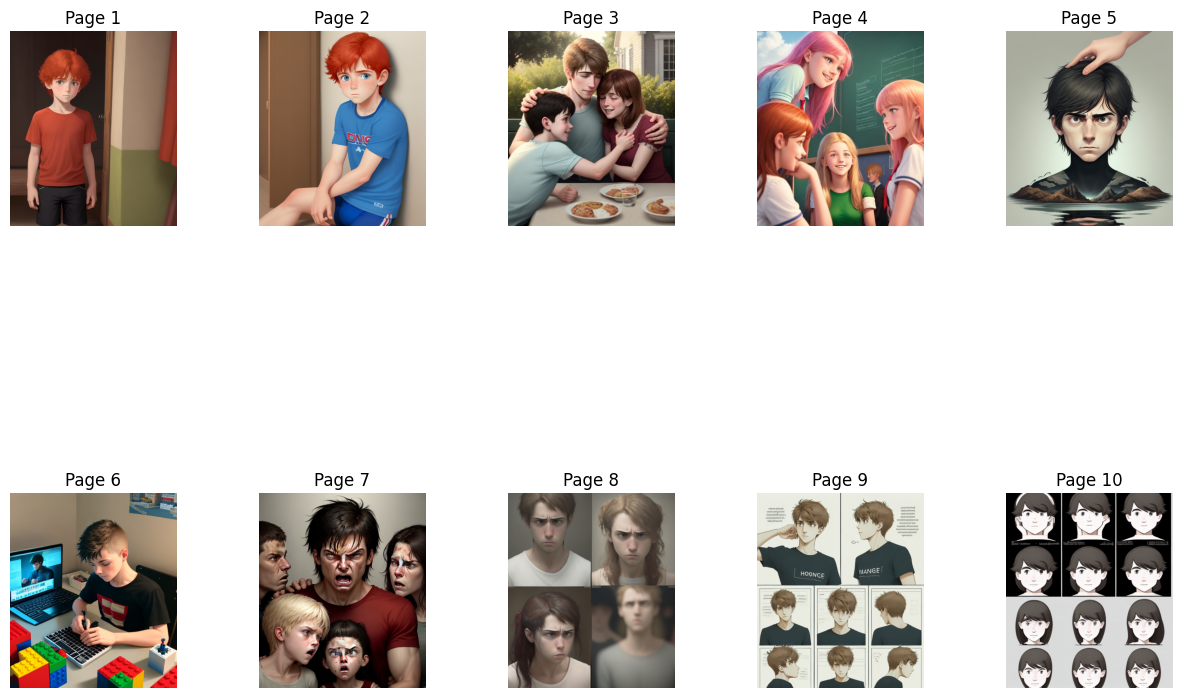

In [ ]:
from PIL import Image, ImageFont, ImageDraw
import torch
from diffusers import StableDiffusionPipeline

# Initialize Stable Diffusion Pipeline
pipe = StableDiffusionPipeline.from_pretrained("stablediffusionapi/rev-animated", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker = None

# Base image prompt for Alex
prompt_alex_base = "illustration of a shy, 8-year-old, red-haired boy named Alex, the main character, iracundo"
height_alex_base, width_alex_base = 600, 600

# Generate and save the base image of Alex
image_alex_base = pipe(prompt_alex_base, height=height_alex_base, weight=width_alex_base).images[0]
image_alex_base.save("alex_base.png")

# Initialize font and ImageDraw for adding text
font = ImageFont.load_default()
draw = ImageDraw.Draw(image_alex_base)

# List to store generated images for each page
generated_images = []





  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

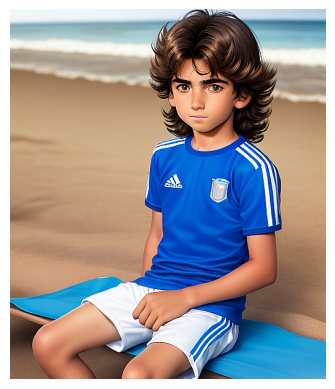

In [ ]:

from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Page 1: "The Boring Day"
title_page1 = "The Boring Day"
prompt_page1 = "realistic fotograph of Alex, a shy and iracundo boy with 8-year-old with blown hair, wearing blue sportswear, sitting down in Argentina beach"
negative_prompt_page1 = "lonely, monotonous, dull, uninspiring, uninteresting, bland, lifeless"
height_page1, width_page1 = 600, 600
negative_keywords_page1 = "(((alone))), ((isolated)), ((uninspired)), ((disconnected)), ((lifeless))"
image_page1 = pipe(prompt_page1, height=height_page1, weight=width_page1, negative_prompt=negative_keywords_page1).images[0]

# Aplicar un filtro de aumento de nitidez a la imagen de la cara
image_page1 = image_page1.filter(ImageFilter.SHARPEN)

# Overlay Alex onto the generated image for Page 1
image_page1_with_alex = Image.alpha_composite(Image.new("RGBA", image_page1.size), image_page1.convert("RGBA"))
image_page1_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page1, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page1_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page1, height=height_alex_base, weight=width_alex_base).images[0]

# Mostrar la imagen en pantalla
plt.imshow(image_page1)
plt.axis('off')  # Para ocultar los ejes
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

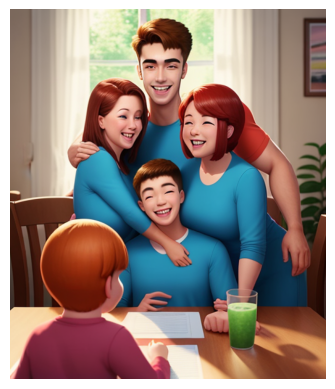

In [ ]:

# Page 2: "Family Concern"
title_page2 = "Family Concern"
prompt_page2 = "heartwarming scene of Alex's family showing love and efforts to help him find friends and joy, image 1 is among them"
negative_prompt_page2 = "cold, distant, unsupportive, indifferent, unloving"
height_page2, width_page2 = 600, 600
negative_keywords_page2 = "(((unloved))), ((unsupported)), ((neglected)), ((cold-hearted)), ((indifferent))"
image_page2 = pipe(prompt_page2, height=height_page2, weight=width_page2, negative_prompt=negative_keywords_page2).images[0]

# Overlay Alex onto the generated image for Page 2
image_page2_with_alex = Image.alpha_composite(Image.new("RGBA", image_page2.size), image_page2.convert("RGBA"))
image_page2_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page2, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page2_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page2, height=height_alex_base, weight=width_alex_base).images[0]

# Mostrar la imagen en pantalla
plt.imshow(image_page2)
plt.axis('off')  # Para ocultar los ejes
plt.show()


In [ ]:
# Page 3: "Distant Memories"
title_page3 = "Distant Memories"
prompt_page3 = "vibrant images of Alex reminiscing about school and club friends, focusing on happy moments and potential friendships"
negative_prompt_page3 = "awkward, distant, strained, awkward interaction, strained relationships"
height_page3, width_page3 = 600, 600
negative_keywords_page3 = "(((awkward))), ((strained)), ((uncomfortable)), ((isolated)), ((misunderstood))"
image_page3 = pipe(prompt_page3, height=height_page3, weight=width_page3, negative_prompt=negative_keywords_page3).images[0]

# Overlay Alex onto the generated image for Page 3
image_page3_with_alex = Image.alpha_composite(Image.new("RGBA", image_page3.size), image_page3.convert("RGBA"))
image_page3_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page3, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page3_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page3, height=height_alex_base, weight=width_alex_base).images[0]

# Page 4: "Difficult Moments"
title_page4 = "Difficult Moments"
prompt_page4 = "illustrations portraying Alex reflecting on challenging experiences due to a lack of understanding, with a focus on personal growth"
negative_prompt_page4 = "difficult, misunderstood, uncomfortable, challenging situations, strained connections"
height_page4, width_page4 = 600, 600
negative_keywords_page4 = "(((difficult))), ((misunderstood)), ((uncomfortable)), ((challenging)), ((isolated))"
image_page4 = pipe(prompt_page4, height=height_page4, weight=width_page4, negative_prompt=negative_keywords_page4).images[0]

# Overlay Alex onto the generated image for Page 4
image_page4_with_alex = Image.alpha_composite(Image.new("RGBA", image_page4.size), image_page4.convert("RGBA"))
image_page4_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page4, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page4_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page4, height=height_alex_base, weight=width_alex_base).images[0]

# Page 5: "Solitary Pursuits"
title_page5 = "Solitary Pursuits"
prompt_page5 = "scenes of Alex engaging in solitary activities like using a computer and building with Legos, highlighting his independence"
negative_prompt_page5 = "isolated, disconnected, independent, solitary, alone, detached"
height_page5, width_page5 = 600, 600
negative_keywords_page5 = "(((isolated))), ((independent)), ((solitary)), ((alone)), ((detached))"
image_page5 = pipe(prompt_page5, height=height_page5, weight=width_page5, negative_prompt=negative_keywords_page5).images[0]

# Overlay Alex onto the generated image for Page 5
image_page5_with_alex = Image.alpha_composite(Image.new("RGBA", image_page5.size), image_page5.convert("RGBA"))
image_page5_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page5, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page5_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page5, height=height_alex_base, weight=width_alex_base).images[0]

# Page 6: "Overwhelmed Emotions"
title_page6 = "Overwhelmed Emotions"
prompt_page6 = "depiction of Alex experiencing frustration and anger with family, showcasing emotional struggles"
negative_prompt_page6 = "frustrated, angry, overwhelmed, emotional outburst, expression of emotions"
height_page6, width_page6 = 600, 600
negative_keywords_page6 = "(((frustrated))), ((angry)), ((overwhelmed)), ((emotional outburst)), ((expression of emotions))"
image_page6 = pipe(prompt_page6, height=height_page6, weight=width_page6, negative_prompt=negative_keywords_page6).images[0]

# Overlay Alex onto the generated image for Page 6
image_page6_with_alex = Image.alpha_composite(Image.new("RGBA", image_page6.size), image_page6.convert("RGBA"))
image_page6_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page6, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page6_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page6, height=height_alex_base, weight=width_alex_base).images[0]

# Page 7: "Social Challenges"
title_page7 = "Social Challenges"
prompt_page7 = "images portraying Alex's struggles in social situations, highlighting challenges in understanding social cues and forming connections"
negative_prompt_page7 = "socially challenged, misunderstood, difficult social interactions, isolation, difficulty making friends"
height_page7, width_page7 = 600, 600
negative_keywords_page7 = "(((socially challenged))), ((misunderstood)), ((isolated)), ((difficult interactions)), ((lonely))"
image_page7 = pipe(prompt_page7, height=height_page7, weight=width_page7, negative_prompt=negative_keywords_page7).images[0]

# Overlay Alex onto the generated image for Page 7
image_page7_with_alex = Image.alpha_composite(Image.new("RGBA", image_page7.size), image_page7.convert("RGBA"))
image_page7_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page7, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page7_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page7, height=height_alex_base, weight=width_alex_base).images[0]

# Page 8: "Decision for Change"
title_page8 = "Decision for Change"
prompt_page8 = "illustrations of Alex contemplating a decision for change, exploring the idea of seeking help and making efforts to improve social skills"
negative_prompt_page8 = "indecisive, stuck, fear of change, resistance to seeking help, stagnant"
height_page8, width_page8 = 600, 600
negative_keywords_page8 = "(((indecisive))), ((stuck)), ((fear of change)), ((resistant)), ((stagnant))"
image_page8 = pipe(prompt_page8, height=height_page8, weight=width_page8, negative_prompt=negative_keywords_page8).images[0]

# Overlay Alex onto the generated image for Page 8
image_page8_with_alex = Image.alpha_composite(Image.new("RGBA", image_page8.size), image_page8.convert("RGBA"))
image_page8_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page8, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page8_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page8, height=height_alex_base, weight=width_alex_base).images[0]

# Page 9: "Research and Learning"
title_page9 = "Research and Learning"
prompt_page9 = "illustrations of Alex engaging in research and learning about social interactions, showcasing a commitment to personal growth"
negative_prompt_page9 = "disinterested, passive, avoidance of learning, fear of knowledge, apathetic"
height_page9, width_page9 = 600, 600
negative_keywords_page9 = "(((disinterested))), ((passive)), ((avoidance of learning)), ((fear of knowledge)), ((apathetic))"
image_page9 = pipe(prompt_page9, height=height_page9, weight=width_page9, negative_prompt=negative_keywords_page9).images[0]

# Overlay Alex onto the generated image for Page 9
image_page9_with_alex = Image.alpha_composite(Image.new("RGBA", image_page9.size), image_page9.convert("RGBA"))
image_page9_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page9, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page9_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page9, height=height_alex_base, weight=width_alex_base).images[0]

# Page 10: "Building Connections"
title_page10 = "Building Connections"
prompt_page10 = "heartwarming scenes of Alex building connections and forming friendships, showcasing growth and positive social interactions"
negative_prompt_page10 = "loneliness, lack of connections, isolation, absence of friendships"
height_page10, width_page10 = 600, 600
negative_keywords_page10 = "(((loneliness))), ((lack of connections)), ((isolated)), ((absence of friendships))"
image_page10 = pipe(prompt_page10, height=height_page10, weight=width_page10, negative_prompt=negative_keywords_page10).images[0]

# Overlay Alex onto the generated image for Page 10
image_page10_with_alex = Image.alpha_composite(Image.new("RGBA", image_page10.size), image_page10.convert("RGBA"))
image_page10_with_alex.paste(image_alex_base, (0, 0), image_alex_base.convert("RGBA"))
draw.text((10, 10), title_page10, font=font, fill="black")

# Append the image to the list
generated_images.append(image_page10_with_alex)

# Save the image of Alex for reuse in subsequent pages
image_alex_base = pipe(prompt_page10, height=height_alex_base, weight=width_alex_base).images[0]

# Save each generated image to file
for i, generated_image in enumerate(generated_images, start=1):
    generated_image.save(f"page_{i}.png")

    import matplotlib.pyplot as plt
from PIL import Image

# Nombres de los archivos de las imágenes generadas
image_files = ["page_1.png", "page_2.png", "page_3.png", "page_4.png", "page_5.png", "page_6.png", "page_7.png", "page_8.png", "page_9.png", "page_10.png"]

# Crear una figura de Matplotlib con subgráficos en un diseño de 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 10))

# Mostrar cada imagen en un subgráfico
for i, image_file in enumerate(image_files):
    row, col = divmod(i, 5)
    image_path = f"./{image_file}"
    image = Image.open(image_path)
    axes[row, col].imshow(image)
    axes[row, col].axis("off")
    axes[row, col].set_title(f"Page {i + 1}")

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Mostrar la figura en pantalla
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
!pip install accelerate
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("Lykon/dreamshaper-xl-turbo", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker= None
# generate image
prompt = "closeup portrait photo of bald 34 y.o man, 8k uhd, high quality, dramatic, cinematic"
h=600
w=600
image = pipe(prompt, height=h, weight=w, negative_prompt=neg).images[0]
image

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

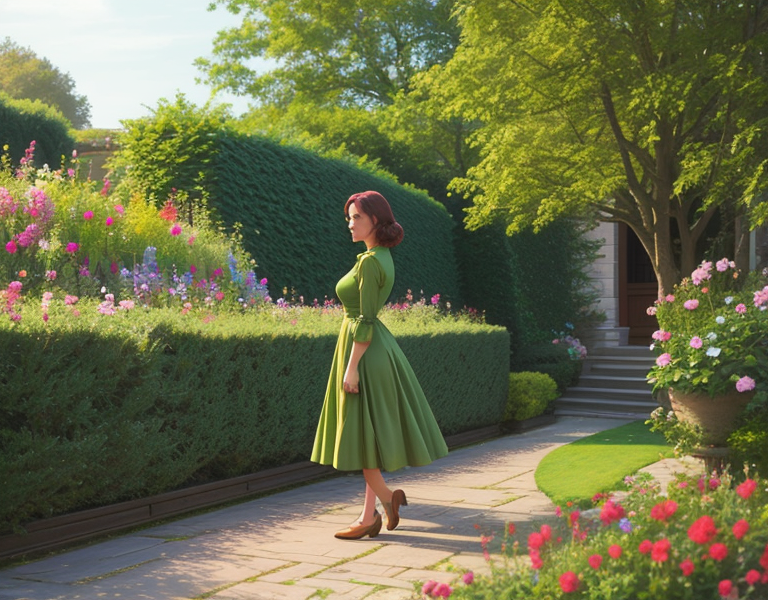

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("digiplay/RealCartoon3D_F16full_v3.1", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker= None
# generate image
prompt = "photo of a woman in green dress in a garden"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality, blurry"
h=600
w=600
neg="(((close up))), (((mutated hands, deformed fingers, mutated fingers))), (((watermark, text, logo))), ((monochrome)), ((b&w)), negative_hand-neg, ng_deepnegative_v1_75t, dangerdonkey, negativeembed, veryBadImageNegative_v1.3,  BeyondV3-neg, EasyNegativeV2,"
image = pipe(prompt, height=h, weight=w, negative_prompt=neg).images[0]
image

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (89 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['face : 1. 3, wearing school uniform, overweight,']


  0%|          | 0/50 [00:00<?, ?it/s]

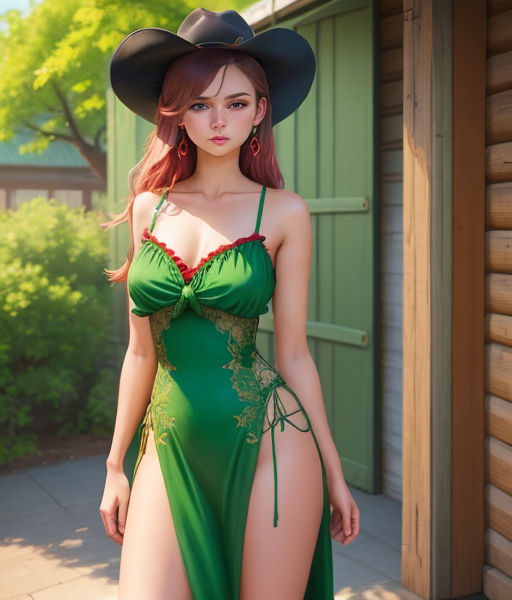

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("stablediffusionapi/rev-animated", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker= None
prompt = "woman, (cowboy shot, full body shot), (frontal view:1.3, looking at viewer:1)<lora:OrihimeInoueV1:0.4> orihimeinoue, green, eyes best quality,red dress, hyper-detailed, intricate, detailed eyes:1.3, extremely detailed, masterpiece, RAW, extremely detailed face:1.3 , wearing school uniform, overweight,"
h=600
w=600
neg="(((close up))), (((mutated hands, deformed fingers, mutated fingers))), (((watermark, text, logo))), ((monochrome)), ((b&w)), negative_hand-neg, ng_deepnegative_v1_75t, dangerdonkey, negativeembed, veryBadImageNegative_v1.3,  BeyondV3-neg, EasyNegativeV2,"
image = pipe(prompt, height=h, weight=w, negative_prompt=neg).images[0]
image